# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

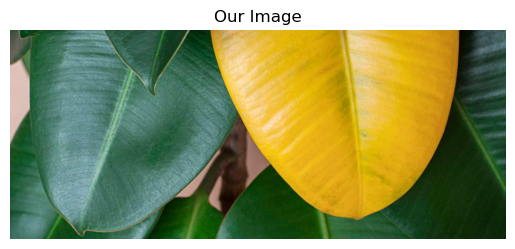

In [1]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [2]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2

# image loading
base64_image = """/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADIAMgDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDnNNDYfJP51rW9pcXb+XApeTsgPJ+ldl4S+Hs39n/a9ZhlgYZxAEBkP+H412NwttpEka6fpFsshVXMk4C57cHruFcvI3qza/Y4HR/A+rXt3GLmCa1hb7zuPun6eh9feu8Fr4c8PrFb31zatckfK1wwDsp9fUe5qG51omSWH9+5gYM5jl2Oh/4EDkY9uayLrVrdrd7e402TDtmLz4A+fSQc/Lg9hz7VpGKQndm1JofhWVAXjiTHIKuRj6c+/SorPwz4ZnO6KV38kfOrSDIz0Y+n8jXIMZ5HM3m5gTk3EaglT6MF5xnsefesG6mutNtXuf8ASXXb5czx/OTHnIZeQeOT0zTsuwj2S40DR1tbKOVAsVn/AKn58ceh9RzWJqXhDTnnmk8wwrsMoiJHDHsvovXj3riLfxZdxW8u6ZZWRJUjaMllkyODznH0H6GrWjfEaLV7/T7QNboVDxhpZeHym7I9+o5oaTErmZqthJYXpgeN43YCQK3ZT0rP+b1P516tc2Lazp7LFaRG8jXGW42yHkE+q4/U155qely6XdmCdWWQDuuN3qR7VhONmWnczMN2JrpND05nKswPNZFnb+bcLxkA16Ho1oqRgkdBUGtOOtyxHaCKEZ9KytRk8pDg4rfupAqY6YFcfrNyPmWmkayehk3NzHc7kc4Y8dap6fGYJJIXJKt93P8AKqsjEy5Famnxx3MDBm/eLyvrWM7xemxzvUzjDJa3EiEnA5B9RVRyS7cnrWxfzB4VBTEkZ6+orJ204NttkIZz6n86b83941Lto25rW9gaIDn1P50xifU1O6YppifH3G/Ki4rFc7s9T+dSwKzyjBPBz1oaFwM7Tz7VcsoWSdWI+XuaUpWQFiWWaNUBJHNFWdTaN1jxwc45orOEItXZXMzvL/Xby5uJDDfx6baIhYy3ACnaOrAHqPc49q5K48WxPcOLK4g8tmUSXd0hZSoPG0c5bv0/SuBvtW893RtQ+0Kx3bFBEYxwCWbliO3GBWLe3sKxCe4urh4m4jhlkZvM9SB2H5Zrt3A9Aj8dRSXjmztJhErtmdIjHI3bO9mIGevrjjFA1rU7qVsXSeUMEIXDbfbHPzf7XSvNJdXmuohmJ4bcH920p7DsB2A9vzqTTniefcL2RhjByhRD7Y6fnTEehx3l8JfMt4wZughUnP1GSMn86sRXEl6HF8PImQnc7MIiR6EYwfx/A1S0+zmmjVIIU4X5Ckv3voG45HpWibDVo4WS6gNxESVZY1O6NQM4YMPy5ppE3Klrptt9skeyilkEu7IkAG0EYfAHBUjkHtj3rmNHXS49VvP39xcT2kZdVaNXXzlPLdBlgq8dQOT2rqr7WtOs9NEVhCtvchSGkkxMrIeAi7eB+GemKbHFbaX4eVjPZz6tfOhDuNmURsqzAZ2DcQO+duDnpSGzofDms3+jyQx3SNDDexebLFcZ3RsBkfN/dI6V1dxLY+J7PyZRChDABiQXX0Ax2z+deJ6R4slt/Es1i9z59rawuhlnjKjltzOc/wB4njOeMV2PhqdLnygHjtopS0ce2b58g9AD1xwQe9Ethxtc17bRJ9Ov2guV2sDwQOMdq6y2AjhArS09LoWvlXsqzRogAkdOXPY/5FXzHATskWIsRg8DmsvZGqqqOljktSnKQk5HT8q4TU7otKw9TXrdxBo6xtHNHCVPUHnr61kTeGPDmobQlqFmJJHlzYb5TgjqaORpCc7nlmw4yR1p8Mr28m5e3au81XwXbSqJtIu4kVgd6Ttw2Op3dqyP+EG1psqEt24yreaOazcHsLQxLmX7Vb79uCBziszo2K6j/hFNdgZom092BGAUYEVlPplxA5FzbTR4OD5kZUGoinEUUZ+2k8tnYKo+p7Crr2xaYKmME9u1b+k6REwlkmcRRxrkuw+X8fXHpQ/e0Q2jOsNFknZQE7gOx/hyf5107eBzOzKjldj859OwH9azdQ8aafYaPqVxAYjOrKiSRgkL0wWHbk5x6Y6VX07XL+70aKWHWkjkjdpFMagmaMHLghjw2MHbwccAnNbxopLUzZ0ieCrG2tVguL3fOTgMy8c9ePoOtVx4R0nTyJ7/AFNfJJ+VR1b0/wAis21u7LXLzEU8zqv745DNHC+OM4yGbGcpnq3oKuTW819vEVriHzGEs0kgUN7KQMjGMbh0xwO9X7KHYQ1vC2hapKsVhqTNcNF5qgoWAXPUnt2wPx5zRVSfSYdGaWWyfY5dQ1t9pLRyM4+bLEZyMZOOelFVyxXQZ5he6RZ6Q0iSXUd1eMp3BBiKL8f4j+n1rmBp815PJcMJJdpx5jnAx2/D6V3l1ZwSO4Nv5ryElmYkogz2Hc1zviK8ggVYVCBl5MZPQ9s47+1CHc5i5gIlYyzb5DxgcKPQe1WNNeaWQRwCNmJx8z4/U1HFHJPIJJJVBPRcbcf41fTTtuHlhkbnIwMKPc+tMDtNBguYyFaGcNjhmUMmf90c9e+K1rvX7/SoC9xN5ltkb0kJIPPbsT7npVDQb6/jszAba4VCMKwG0Efj0+uap61qNnapMk4eKWBCyyeYrYPX5QOefU1XQz6lS/1WHVtUa7mtbWKa6jMmzLgIidGVeg4GAe9Y9xf3lvdyTtsudRvAIooQ/CJuyI27rtGOOKx9U1YtqG+ONfIgMfmTJliOMhdx7ZyAvTrVO81GFdXP2RGUtAQSWyXkb5iWP4/pQkNs2fNmSGZCXdIJlmuZFHzXDfdAPsvYfn1r1fwLDbHTobi4Z5MozRI6bPLYc9cZBx0rzHwnps81w5klC+YmNkoJDtkcgdcjg5r1axTV5ERrST7RY2c4ga3t5wpRR945HU87v9nmpkVA6W6v5YZmlmnvARFGDknbEG5JDfxYDAHPI5pDqwNyp+1MlnFlpZ3UgsiL8uQR/F2PoDWRBq97ZavFpeopPbW5SZVJiyty4PDKxHzcEH9KZcTxtbRQxODtga3khxulYKQd6DOOB29BUWNLmpaaxaXNv9oso42d/mijeMg3IyN2OegPII7CoZNYWKe7vbWyW6klc7DC+fMXgnYo/u4znvWLrY1KHUYGsEhhW0UOGcbSgI2jG7pljnjscY61lOuraZEs8zql42FEJHlCKJSWlcsOhb7oXPPNFgudc+py3d1bC1u47WMLI0kZIVgcYVZCMgEMelbtpdsXKLI5uHchXij5PTlyeABycfSuD0qOeytZ7e902BmmO+W5+Vprgbd6gqDtDcg5z6d6nS6NzpjzWUbTW0MYUPKzIzMR87qDgKB0JHJpWHe538GvPvRAYnEzbIrh3AjZv7vHVj7Vrw3cc8JEu3IHzjHA9eteawatLLLbPGDPaSnJkYbhgYGyJCMgk9OBwMmreo68Ledo4EbzYtxNtuLhcnH71um1TngZz0qk2Q4pnZn+z5ws8dhbsJV+ZmCg8dv8+tcZ4m13/QLZbBRBMrFvKjXI2nIBx03HBGD65qhdXVpFFAPtMbmdw85R9sRBwCNv3lBOPY8VzPiy9mGlToZ0hSaZFjtoWDSQIwwG3HHPViCe3OKFuDSSM2J7RNfFpdzPNpswleORcbgwVfunGercqfQ47V0T2FkLiKfxBqmnrbSxj7WsZKGQr/qwF/v7QM46nnpXlmkhtQ1LVdt0jyxxeRbEJhcE48w9hxk59673RdI0jULG6kle6bUgqhrucfuC/AAHcE9eO1VYgvz+NbjUWSPQreytrWBSkWQQEXHOMgck4znk1TbxJexacsk10t1NG+U8q52LwOdx4J69MVoy6K1y5ASGQ7gjxRoG3HGOS2cKexBrM1XRdOsYfscsCfNGyhRhmjZjnhsDkcCizHdGbHqVxf3puJpSpjwXhUbGGDkKD0PPpzgUVx7aStrOoSO6t4zIAJSWJR+3GAMDjnmikM7/AFzVcGRIDDFIB8i4P7te2emW9u1eeXih5sXDs7jlRnArsb62ht97XtwoySxSIck/U8k1yF5N507JaQE4OTu5A+p9aEIZFbxFgI/NZh0A6V1OmWWovHuTTjJngPI2B+A7Vj2Qmt2WSSdIJG4AQ4wPWuv0zWYIo1RvMnOOXlY9KYPYJrVre2aS+cSvywj3nZEB+OSa4PWNTlMEp88o5YiNQo2/p3FdnrE8mqP5IZIoR8zRp6dua4HxHbx2giWCQTtsYuyIQo56DPJx696pEGdday0mmwWMSgQQrgADhnP3nb1J6D0rZ8KeGIr2Jr2+dlQj92FBJGejN7HsO9YGg6Q+t6xDYI+wPks4GdoA5Ne3eGtBVtHjEk0cduZVhtVUgJNs+8z7h05wO/tTegrXJdN0yDUdPtYkhuzHEC4kA8kb0xtRWPI9T611NjJNfXhhuUu7AyLvkSFQW3E4JbAxvxnkDpV+30uKwsPskDvPHNNvYNKwfaeg24yAT7Zx2rWje5t7bMo2xxoVMKgO8hHDMdoB468HNZ7s2WiOdubCPSGtUgE01u027fu3mGQtk5xnaNowMYzk1b/s5XjXdFLZiS1DTKmWCANlUQHncQe/Y44xVzV4lW4aRSBathJUE5DFCOCpHTufmPbin2k0cuqtbTXLTxRlXgYRbsK3ymJ2z8xzhsjtzRYVytdaUmoxWyh0jiLKW2pudm25ADHpxkE+vfioryyMenX8cTrbO0G+FOZThCACQf4QeNp9zzW7LbPNDcbAFaRWhIJzgAYXCjoe/HHGay4Cs1yhgvIVBj2CcJiUsvyhcZ5B56857c0wTOfuoE0mJr23xJNMMRBpGVlDHDAJgBmPXnnaeMVXuUkM6xQM6WagXcpu3XYJONiysPlUDHQegHXmt+4tLN7qK41BpJZI1WaAAkIZOdznH3iCM5x9OlUrqA32npcC4doWSUII4y7t0VR0CqOp5xipGcxJpztdfvBLFJO3mLtl+cEHnIByVwOp6ZrPhnaKxZbd7MRmdozLv3GdnOGcA9wMhR68+9dZaaMBEtpFLJPbyW26S23bluNxwdj9eMEMc8gVy+q3VsszQXmmrHLHGRHdeY4AlGSEBwN2F4zzjFAGdNNFb3H2yBxAUYeVBu24bIXaobOOAD2x171i+NL+STRmykXlqwZVjUbo5SSdpBzkEEknvx6Vl+IZ8WUa3aMrRTNHLlCDFkYOAfvDjr61QPkvBcXqy+c7LsWJvvPlSCWX1BAP0xVJEtlfQtWt4tU+0XzNN5y+VNDFHgyIQcjqBkHaR9OK9M/tCSz0+w+yypdpOglj8sfvY4c4Bx68HIPI5x6V5QbNbaRomhk80DEjJICD359O/Stix/0COS5tb5iJds2yfnzIyfmVueccHj0HSqsRc9Zl125s7QPZw/aIwdpcfKQCOhx0PqK5q6v5b5h5ztG6/cEbYI/POB+dc74g1kvZRwabHdWkwBZ1D7g3Hr0ZSOh6/lXL23iHVCgU3bEdBlRSaKR1GrQI12s0kk91OCADPIdqj8gKK5zzrm8njNxctIQcAO/FFIs9FvtJA/f3jmRic8qRgdsCudvZSXFtbKItxwoAyT+Vdj4gtr68lXc7AuSQufuqe5qj9istCt2kYb5SPmZhkn2HoKSJZB4a8LCFZLm9dJWPRnJAH0zW9La2xKpEiPxxgYzVPR7y5vnEt5HFGpP7mMtyB61vXFwUBIMajG1TwD9aszMK4gHlyjYI8AgnaOfY+1edeIrWWaV2jLOzHrwFUfT1r0a+mk+zlYjlmPUc1yk+jM92FklBdjkr1zSuMl+Ffho3st9dyW3miMBFV2Kh3z93I7Y617Rp+n295r9rbSNDMLFQpt0UFIyuSW/2WycgDsBmsfRdAn07w/p9nDFbLHISZmwdzSMcqqjqcAcjr7iu2toItH0uSW3QFpSNqCPG8nryOhPJJ7cUm7suKsrl65kjtFMkUOGQbnbgEqPfqO1ULrUp4Sssdo8izIzeUrBWA4wwJ6H2qhqN2Els4zex27TFEaIIr7Coz8pznJ6cnGDWfe3x3pJI7vHJGFaKQYYcnDAfw468n1ouVY1JriA3cV5F5jM8Sr+9jy84XJKkH+IE8HH0pkNozalLnylljcGKIMQFhA+bcOm7J5+nFZzF7ZWuJ7yON5R5R2zExJxgHJ5UDOT6nHan3GpWzW/npv8AMQYzA3l8Lja5JGSPUenNAjcuY3uLeSBEM0E6v8yuATnoBjnnnODk0w+TZwNCjXGZHCIV2gM5XcVXjAAxgntjFZ17f3L2It0mjgiliCSNsO9HLYJ46BvU9M9KzZrlkuTb72jh8rzi6FWErZI2qBn5eMHHNAGjeyJb3cEseYbtVw7ZyyK3LDB6noAB7Gs6XUd10Iop7WOQghohI20xN9zY3XcRn171aa8SYMsMixyb9qQykiPaBlyi/wATdPcVIt5bsomZi8rL5NrB5a53nksCo5UDn2xSGZl4lpY6Q1lb21w7EMY4rRiQxxwwGfujkckd+K43Vr2S0sCbiY3Vz9l8po4wrrAj8lsYwowCDnLGuxvdSv7LzJPs80n2d98UiR5V+csFA5BP4njPFc7PZLdxCYzvMxkaZrJLsZbB5x8oG7PUNzgHHrSA4/UNO8+RJZ4LsJIqhJZUBXys8lsHpz93gfL1HSuNvYZtH1GeMSho1kKs0RBQKfukZ7EdjXqurT+fEpeNrW2LSLcYO5iO5bbxwegHavP/ABNa6fLpVjepC5khAivJon+VmPK5BHDY7D8aqJEjm7u6dIZIUdZIpjvYleB9Pf1rR0+8eS2TbEH+zfMkTvjCnOQp/un06j1rItlWclk2qIugLbd3PHNdFpVnPPcQiGCJ2nDlooQf3TDIOR2HuDg1ZBpC2gvo4oZSQXGU5yxXqAccZHI7ZqWfwnG1mw0/yJHB+fedj/iB0PvXYaLoNndxRwxsAjAeWsgw6+oPPPPQ+9Satot3YRNJDblcfKzqcg+h/wBn8aVhpnm39kTafMqXCbTx82Pl/OitaWG8kO7c8qCTHlgFgrDr15Ge1FSapnpV3ZLFcSSzsfKjP3e7N71xt9Fd3wa9JItkbCDp5h/wFereJdIVo4Zz88T9QOlczf6P5sccUYLRMcBMY5rO9tB8t9TlNKlkupBIeVXjzGGAMelb2/YpKI0khHylhwPfFaMWgm2RQVGEGABT2tUQEEEu/BPt7VXN3I5Tkrpp9zbMnHVmFN8O6WbvX4Wmz5SZllYj7oFdiuiQSqpaUbiOEXmtXQNJGm2tzdymMNnaqOOT7+2Pep5rsrkN21/cXojDQz3MI2kxMCYk/iwp6ZJHI5wOao6h4wtrG9mllm/cRnaghX7/AK5zzn6cYrJn1u58MWT3rWUF00z+UsbZG4jkvu5JHXj3qOPULLxQ08FxZSaZqdnEJbm3kTcDH1yjDqParQ7PoX7u5N6XR5WW1kKkJHIu5SRn519PYEc9Kr6faxT2VxI4cfaSx2sh3GPHBKHpz0A9KTTvKeCJUWPy58uEPU/NxwecD+ddBYWjpZs6uPIXhsIVcL375BJ7+n1oJKGqRTi1lSGJQ8kS43sA0qAZDEnjqB2xzjrWY1hLEXEskkvnRmNt68OgGQsbdQQTz9Mc12G5VVFuTbxSYChHcBkU9h+XT6msaVLucOwlid1AYLFkvIQScYP3fYd+aGCOeW5m3eUGBUYBEYJlRe/PU59eSSKngMFvcT3EXkRXcxVn2n/VA9VLddxIGV+g9acRPZrFdQRh5WHlb0YokitghVJ5Q5yPfBHeo7wnaELKjSMZMLH8pY84Zeec5YZ6UwEGpTyAq0E29m2uqzDzIcjOeMKpPcZz6VcW5FvNGn9nlY5PlmT5VaFgPlXHP1yeuTxxWA1zcWFsGRPs8MshZYrhfmyeCc/xOcZzwBkDiqUGu3rvHBJIwuVYFfPkI2pnOBHg9uc+1ILnUXsF3pd7LqRuEvIRbiNGkB3gD7xyOcn7ucc8CsC382CRZpbPyEmH+jmNHV1x/C+fUcE89iadHfC/WdZYYgsPzRliSzMCShznhQSeOnOataaReSyW80Lz28C/woVfnqFY8DBzg5+o5osK5zep6TNfxJqFpLFIsbAeW7qTGw6KVXAbHOPSuBvvtGoGWBoriR47ncYpY+ST/wAtGI7+o54r1Ke1imfWptHZPsURGEbKvCB95ivX1OTXHTad5bXEFsxu4NheKWN8PEQcHP8AeAP6GmhSPNl0+5aaXYmNjMPQcda7jw7eeXNA/ltHH5YWWMH5Q3TcD1z7VGdPHAQv5hZY5JWQkIM8DHT8fzro9NsI4HSRokdHOxgFwAfX61ZBrrNB84AE0fDiRB98cZyf59OldXYtcPEHy8sYGCHGSQeg46/Wufjgit7sm0IOY/3kBYjO72PfmnpqFzp94ElgmGnvFiRRkrHj6cjHt7U7CKviax025lhuI38hipAdGwv0IFFY3iu/EV0r7Y5LCc5E0JDKT/tDqDg89j1opNDTZ9Bx/YNa0/CrmJhjHQiuT1OxuNAciNFeBh8kr88+/vR4X1M+QiJKiqrYxXdTQQ3cDRToskbjlWHBrBLm9Ta/L6Hna3lu1u007AleAB/FWDfXInnJjAVR0xXVa94Okt4Xn0ws6Lk+UeSo9vWuNigd5hGVIPfIrGd1ozaFnqjZ0KJ2fefu9RXTXlm9w1vbxLygDySFd2wckn+mO9UNNgEUSjb16itfUZYba0SKaXy5p2LhUjLE+mfwqqWt2Or7tkeT/GHWLjRbzSo9NYi3+xkqJRuG5mBywPt61k/DbUtT8ReK5bmad/stpB5YVTtQqx5GMe2fbmu38XaPa+IZEjv7dZ/LXMbtwNp9wetM8O2Njo0C6dpxgVp3A8uEc7ug3HuP/wBdboyVrnRLAkV3BFFbq+Bgc7dvUjJ7nnp0rnvEnjiXTHfT9Ijkub+VBgKvKtnGR6Djv61seJLnbaXU1sGFxNOLNUf7oVerL/PPpXMWtva6fCCJPMuJeXlY8vjsfQegotdkNnON4W8Q+IbtdS1fVfJnTqqlhsOe4+n8qrx6hr3hLURI94buAuCWYF1OT09VHtXbPewiP5gWBHylj6e3euf1f7NqMBiO4ZOAAMHPqBVJEtnV2Wpxarapc2kkT3kpA3W5bZjkgMvp1/EVTW6a0s9yPGJWUSO0Z3dOpGPvHjBGPbtXn3hi9m0fVptPvXYROA+5WwEUH5SAOc5JrZu9TkkklELkBTtUbMMPXkccj9cUraj5tCfUbkTk3BCsrAybd2x9zEcn2xzxVGLSr+9ubRvOLxqDgoNpJ7AEc4x3NRSWVxfszRHy4o3BZkXqe2Pw61W1PVE2Cwmv3tNPEgikkQEPOwAJX/ZAGOe+cU0hdLs7m10ee3ka5zbXSouGib5m2kdAc/pUCOFd1F000BxLtnmzsIBxgZ4x0PXNcJHdaNNqNk/h29mt5xOsMkMjEM4JBznoV5xzzXUvnTtUuIbhIQwmYCTvt5wT1OcZGPyosGxatzs8Uyi6G9rmNo5pY1YIdy5C8YIwCMluAScVi6npr6fdzOjYdA0KqhJQNjB9hjjjvxXQ6k7QXVnqzvG85sysjgHaSeImUZ+YgZ9uRkVAsKy6M0IeQSoAcLk7ieTlTwOOtJAzkZAlpHGHhR2eHBdXxyeen1pLTWftNm9n5eCo+TecfN6cf57VYvTA06RLvHzgq6KBz2HtVSxslk1UNIqAvIAQAQM9QaL6iSOpJRZLW/jaQ+bbgOEbLDjgqPTcK6O11GeWxSW4SOeJsyoQAjRscdfY8jPvg1zlzYNDYzBAwaHEq7BhsBgxCn3robH7PdaXIzRf8snjYoxAIJDHg/w9x6EVomQ0cdrUlr9smsJcofN8qLMQGAQHXPvgken0oqj4i0y+k1lk+eSRtksTKNxcryG9CuM9PSiobd9CklbUseGtduIrgqCTGx9elew6H4jjRFR7kOxXOGPSvnrR5ti5UYNdRbal5Nt5hYlyeuazcTRS6H0DZ6zb3c/lKwBI+XnrTb3QrG+k87yxHOP41HX615F4f8QAXjOrkhE+XnvXd6d4lkeMSMeBw3NJu6tIpKzvEty2UlhITKrbOzL0rnfEd7NHqMdwGZllTySRjA25O73ANdk17BqWnSqVBIXIJFef+L7Tdp9pBCcfaUYAN0LM3ce1EIpKyHObbuzD1LWZbqSJRcySyyoWSMxmNcY6nvjr+NZ3hzU7y318T3Vq00nmcFjhHIPQd/8AgHtQHs7SdreyXyraE4uLtmJY4OOMcEsc+legeGfCyXgW5ms4hbkAKFJXjOQ2D37j0yK1Rl1MrxFdvax2VjcctHEZSoP98559OO1cXfXzLNuMhO44PPQUzxp4jRfFOrSiQuomKo3baOB/KuIuNfedxukGznccHNNCZ2T3jKF8pyAThcnrUlu0sjmbd8x7Hn8K4yDVidqrLlevqPzrcstXjSNlDdccj9aZJoagimJZQuJEXAfdgDnqT3HrUbTL/ariCLO5lQgHBKkfex37+4qHT5TfazD5WDCvLAcggdQR7+lRXkhh8SPJO64V/OXceIzjgfWpGdXaSLBHPEjBpHJBHr6ADtgdq4PxRp0l4rGJs+WV8tGbkEDDD0IPt0qP+2JpGc2wlPzMzSAk5yc5H9RXQ6fqR1Lyo57bMhG5G+5zj+tLUtNWsc14S0G+uNWiluV8iGJvMJJ5Zu3+favVL6Gx1RJ5po8XAIHmtjc2e/sDz+OKp2hs9Nw8yZ3ACRAcuufbuBjt+laI1G5W6dkIkgYgJgfNHj+8D29B2NO1hN3KNqqTwR24mOVV33bQyqVAUbT6547c1OPk87bGzicCbe2co44OPqap6dp6x3N48ZUxupRIskb1Pc/7YPOferksjJb7C37qF2A2jG9RgEA/56UEmNf2aF5RHBtmGAgxgH+8wP1plpBMb+OR0QBQc5PNaF7auJU2OI4+TtyMA8Y2n+dNuLny9Ma4mljRhEWOOuD6Uuo+h0NsbfULNWjBUp8uccUyF00+6SEghM7SPVT1/nWT4G1IXdg9jJNLIScQvtwG9vetPUVc28cuVLQuQxI6iok2tTSMU0QDQ3XWvnbJiYmEA8Y/hx6Y/rRVu5uvPt7a8gP72PCbfqMj8cCij2iQKmzyeJPIkKbCee1akKB1DsOOy5qzbwqgJZdxz1q1Hbvw2z5c+lFyCNEeKPMMeGNbNpeXfkqwOxl+8M9RSWVgZyeuewFacfh+VoTIGP51LLjc6Owvo0tlkhuAGK4Ksap6sBHHE4Y+YJc887Ae4HbmqqSWwsfLeMrJEeGFWbqX7XYecv3GTbJnuB/KlB6l1FocbYQGbWLxEJi8uYE5BAYKOMfXJJ9K9T8Q6/beHvAtzdWM6FggiiAbIDt3B9hk/hXC2+XBhtgqrNLzKSFwvQgZ5I6dKxvHttd6l4as7C4mQRWV/mQIcs25MKSPQHjPvW9zFbnkesai1zdSkuSSeCO/1rK3sF25OPTNaepaNNbOxRCQvVR2rIqlaxMr31LUd06KwU8t1qxHeSOQgLKSccGqBRlQMRgHpToiA4JBIHJpiPSfC0QjgV5N5eVsMwJIX0z3/Kur1DQodZKeWVZyu12VcAf/AF6z/A9p9otbS4XGHPysxwCM9DXcO9rZqVjZU2NsO5CNu45/n1qQPKLmyutIvnSImLuQCAz4479j+OakfUbeWQ+dbSMC+9mXruHQhc8e9db4itLfV1V4ykW1CIpJgDk9Tz/Dg/j0rgNOkOm3KxyWzLukEjSbcqV6Ej3z1/GgDora5tboE2l1P5LERfvQD5mDyG7hRnt3rds7sCLyI4nZ1Gx4wcqoHK4J59+eKxtDsbCwlkuHAkt3Pljb82CSSv1GQOlbNiYrGC9WfPmXG7c3Ubjx8vt/LmkMfHdq1hE0bs2ZMysrcIRx39c/jVgyJGYnUSPBsLCNu2OD+HeqMjRyXUUaj90oQrz97aMdu+RnmrYZhabWGcDYxHHv+QoAJIg7xJjfEpbbnggnpn1rm/FF1EyrpxdYA0LKS/8AD7D3NdEt2FnHyARgjKk5xxgn+tcJqd/a6n4nmmaDdZidRvIJC9l/D3pLcY3wzqN3pWrWtpJLvt/MGVU9FxwRXp8W4alc21y4e1mO4MOCpPb6V5n5KW83FwFu7aQSQjO4MCcEZrfsPEc7STqzx3IBEatgjYP7x/kKJK6HB2Z0zL5QliyRgqc+yn/PNFSXoSS1guomLIV2Mw6bqK5pXTsdKs9TlNjWly0b568Vr22x4+TnNM1NIfOXLAPnpSReXxg4FWnoYyVmbllC0eCp6ngV2NksYiWNyORzXEW29QrbiSOlb+m3REgEh3OamTNIlnVdJ3SYgX5G+8R2/wDr1IunwtZ/Y1QKMd/X1NdBbfNCRsHtTLmwjRFcZyeoqOaxdkzzSSGaC6eBo9zo+QW6KKxvECTXN7HDskMF0PIkjX5QFPRx6EHB/CvQfFWliWGO+VcAYRyB0I6GuOvVSayZ1jLyxtvjU8bcV0Rd1c55Rs7HBz2Vz4au5bLWopHZUJjnAyk/PBDfSuCv3R7+WaONURm3BQPlr6X1q1i1vQLWRzuLxhhkd8c8V5FqXhlY52HJKsce1XezC3MjirS0N7I7bQgXkgcACr1u9vGGjto/Mll/dxttzz0rV/sNS+EUrn+6cZre0XRrexcPHEquesp5Ix/Kk5IOWx0+k6naeFtBht7mWONoI8BNwO44z+Bqv/wkjeIV8+2lSGE55PVfc+metcf4z8l7dVLZmVsZz9/6moPB73VhKsy4EaHDhlDAj0x3p30uQ0dVLbZe4aW8O8Rq0oxlcEcNj8Bx7ms3EnnR5lVtoAdFOVLEEHg9OxrSu70bRK0akK25Tn5cEYxn+VZtpP8Aa3kkIClcDLdxnilcLF/T0ksrBVjmEuyb92CcgMBjH0rRtpgIEgbarBd5Zs8NzngdK5aOeSDzWQmTzm3eWTxuB6n0xWzBcPLMGdH+f5Q6nI4xke/P6UwL8fliFOQm4Kqkkgkc4Bq3JMUVYUAkbb8xPBznv6n/AAqlNdE3CoQoSMB42AwD2J+pxxUEbbfNlnby4APNY9gCev14pXAr+LtSl03TxBDs86f5d5PQdeP1FcomnFTMsUsgWRQ4PQO2M4IPPFRatq8et6pPeRpgxAmJGIxgdMe/eorkm8igm8yVf3K7do/izySB296pCNL93HA8ZmE0ufLLdHDk9h6VJbXQlvjaAbVUDeoPLsB0Y1nQi6nuGjV98/BLqv8ArMDg+5qbTyklx563BilJDbMenY0Aei+GNUYz/wBnToVjjAljRznep6jHtRXI6deqbpPNuPJuEYskoX7uT0PtRUNI1TdiHW9akfWGeN/kRsEZrodLmiuokn359s1wV3bSje7ZyxOaNF1xtPuxA/MbHFSl2HJdWew206kLzwK0LS5SK5D8nNctYXqyBc9DyK2VnTZ8oGazaKizvtJvg8gO8ED1rWVzdyMEIKqK4TTb4Q2xBGWNdbp8xh05WB+eQ1lJGqdzYFrHLpj28y/JIMGvKNdsZ9Du2DoTEG+VgOGHvXq5uFMQxzWFqAS8JilQOjcYIzWsZWMnG+55tpetx2Df2bPLi0mDPb3DHJ3sfu/QCquowKXzhSr85U/5+tWfEHhmOF2WBC0bdUY8Z9awS1xBLslYiNRjB9ula82hlsMeFd2eQSd2ar3+oW+mQSNM48zqkYPX1qC/uJwheCTDH17Vy72c09wJLkszn+LOSOPyoQXBnfVp2lYYQkMgJ+76KfWuhsrf7Iu5hwoy64HJzWZbIsFuSXCZOfoR3q19vWWJl6bzkbu2aGxE91K/lJHGhCMSxA6Y9KqW0gjSWUhy6/KUP8/emfakSYDJZW4LepqzAoeCQs3lNIRgsOaBk1k9tcpKZ2dZOCA+Bv5rXM2xYxGGBUZG088+3pWACoux5PzheSSeFFWL7WYNKtwDIrSnG0ZG4A/xH6UxF27kCHFxJhAcsPQeg+grmdb8STak7okhiskOwRgHkL/9esj+0Z7vzB+9kkZt3ByFUdvao/nQYlIVWyQP4vxNUkS2OuDavFiON4Vzz6Fu45rUcpFZwSOEiVMICr5+Trj3qmjTiGVURh5hVNx+bK55IqyBFH57APPDjapT5gy9BtU9+/4VQF9be4e3+0mTbBE6tFsO3vwOP506S3AeS6z5JDneg4eQ545HC1BFObYRx7IWkjBUxl/kwRxn371YkCPAyPFn5cNvPDEdx+GcUATw3F0moieWJPL4Rm2bufUn1oqmZi0bs3mRw7ljYvJhlH8OPUUVLRSZLeAzM5ZTxmuXvovnLLwQa9OvrW2iWSMgbzmvPNXiEczhRnB5rCnNN2OupTaV2bvhfVjND5csh3pxXYwX+cKK5fw94cMegNesD5jcgVZtLsrJtI5FVKzehz2aO6ivGWIBRgZ611lre744l3cqOK84srgyyqHb5Qfu111pd4i3x49Khq5cWd0s5FsvOcimgDYZXwFA6scVm2N0rW2+Y4UCuH8b+Ibu8P2e0DRW0P8AEr/ePvQrX1B3todDq9/ZeYzNNCuDwGcZridTvNPnl3JPFtB5w4NcPqFsgc75A7sfmO8lSf51iBIZpC8ltIXXhvnG1fT610LUwaN/WdVsRkLLkA5ygzmsB9WhZQodwp6cYFVrmP503nDBuBIQAV+oqu8KkM4feM4ViCMf4inyoVy7LqaKFHmb2HpSQ6tCCWkVsDhQBVAW43OCFATrg/epUtXfLRoxUc/MMZFHKguy8+tgN+6gB543GopNUvJ9gLbdhyQox+FRyQpDCNwO/wDhRht3Z9uv404W6/ZwwjudhYB3RRtz0xk9e9FkF2SPfTsxQyOQ6/N6571HbIdzSm38wj7oz3xjn6Vc+ylpoYSwUbSVVX4b6ED86tx2dza2xhmXfIx5hyq7x2APv3pgUre3ETS+Q+Si7tqpnoOc+oHNOXGJDBAxVwNzSnO5j659q09rxhoDIYXhj/1Z+Xjrtz3wfTrVSdMs62skbxEFpCyZIx169BQIhjlmeRLbEcYkYJHIo6jPQnpirqQfZp2+1DcI0MYaJMbG7MSO/wDOquUa0ZJZicAD91jJx0UnoF/WrD3EU3lQyG7WfYP9aAInxxnC9h60DIcSRrMIgiRhwku7lifXP+TU0W6JIw06MjFnVRwDz1+ueMe1Oby08y3ZU3wc7d5O31bGOvTn8Kia4KKzON0ivlfMXt6DsDmgCyiTXN8o3LHk/uwBuBPfNFMQfabpAlwFmjxkg/K7e9FIZua7c73MqhwGJ2nHeuasrO51LVo4ijbS2WyKKK5oKyO2pJs9ct4EgtEtgvyquOlc3qmmG1uTNFGdrcnAoopR3MpbFe2dxKDgj8K6qyndY1TBweelFFaGZsXOoy2en5IZkI7dQO/1ridVvYLiaR4XEsIA3Dbg4749/rRRSSV7lyeljkNVsJNQu1VlMBjQfvAuF9mPqf1rGlla2Elhc+Z5KqzB4lw0jYwuT6UUV0ROdkkF4FaKFbUODzvKDdjHv0rQe2E+3y4JYxJ1mfCblH65PaiimxEf2H7chiijXdEDwyhixHYkHA+tJHpaZ8qQTwkEEor8KSO3Yjv1oooAe9tM0bQLMWjjyPNmiBPH909dvvULRGHyIDZrJjDGJNzYPY+gzn86KKQBEEguZHaW5gt0IjdZgXJz94YA+U4pfsCSRtd2ZknWKXaFuk+aXPp9Bj86KKYDprO1+WVUuNqDc5l3AjPUEH7vOQCOtMluZruKKNBKYPLwQRztH8LEYzjt9aKKBkRMMjOYrdYLeQYKLGXKtjH5/SlMs6aasgaRZCvlruQkgDoPp7UUUgEtopJPMMq7o5JQZA+VLAdBTxHPdSgyIi7WJXk/J7e4xRRQwI5VkiaZSGWdZFcNgkMO35UUUUID/9k="""
img_data = base64.b64decode(base64_image)
img = np.array(Image.open(io.BytesIO(img_data))) #RGB image
img_gray = 0.299 * img[:, :, 0] +0.587 * img[:, :, 1] + 0.114 * img[:, :, 2] #B&W image

base64_image_2 = """/9j/4AAQSkZJRgABAQAAAQABAAD//gAfQ29tcHJlc3NlZCBieSBqcGVnLXJlY29tcHJlc3P/2wCEAAUFBQUFBQUGBgUICAcICAsKCQkKCxEMDQwNDBEaEBMQEBMQGhcbFhUWGxcpIBwcICkvJyUnLzkzMzlHREddXX0BBQUFBQUFBQYGBQgIBwgICwoJCQoLEQwNDA0MERoQExAQExAaFxsWFRYbFykgHBwgKS8nJScvOTMzOUdER11dff/CABEIAyADIAMBIgACEQEDEQH/xAAdAAEAAgMBAQEBAAAAAAAAAAAABAUBAgMIBwYJ/9oACAEBAAAAAPZYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYMbYZAAAAAAAAAAAAAAAOWuNM5zv0ZAAAAAAAAAAAAAAMcufHnzwb9evbboAAAAAAAAAAAAABpwjx+HDnpjffvJ7ye3QAAAAAAAAAAAwwbMZBrEjRIkaNx0b9pEqVNlduoAAAAAAAAAAYxjnrqbbbb7DEOHDgwocbjzxv3kzJlhOl9+oAAAAAAAAABjTly5c+eG2/Xv13Y4Q4FdX18OLw5537y5lhPsbGX33AAAAAAAAAA15x48bhx5a7b7yJEiR10i19bW1lfAjcdM795FhYWNnaT5fYAAAAAAAAADhGhxIcaPy026d5EiXKk6xK2rrKuBA4aYZ3kT7GytbWynyNwAAAAAAAABjjEhwYMKHG5auveRLmzJWIddW1VZAi64DpMn2trbWllL6gAAAAAAAAGNIsKur66vhx+Gjt1ly5th2xwg11VXwdMAz2mWltdWtlP7bAAAAAAAAANY8Otraysr4Ufjq69ZUufN7a8o8CsruLANkqztrq2tbGTkAAAAAAAABziV9XVVVXAh8dTPTvJmzOrnwiQYnIAz3srW5ubaxmZAAAAAAAAA05wqypqaitgR9QznvKmdWnKNGj6gGes+1urm2s5fQAAAAAAAADTjX1NTUU9bD1wBntK6HPlH5gDPSda3V1a2c3oAAAAAAAABpGrqmopqiujYAM9d9s8+WuABnpPtbm6tLSb0AAAAAAAAAxCramopamv4YAGdts6aAAz1n2t1c21nL6AAAAAAAAAYhVtTT0tXW8cAAyYAA72NrdXNpZyugAAAAAAAAGsOuqaelqq7hgAAAAzJsra5uLWxk7gAAAAAAAAaR6+pp6WqrY2oAAABtLs7e4t7ef32AAAAAAAAA0419XU01PXROeAAAAM9Zlrb3FtbTOuwAAAAAAAADjBrKunp6uBxwAAABmRYWtxcWtnL6AAAAAAAAAGkSvqaioqq6LrgAAAG8uztre3tbCVkAAAAAAAAA04wauqqaqtr+WgAAAO862tba3s5/YAAAAAAAAAOUOBV1VTWV0TlqAAAZ2lWNtbW1tYy9wAAAAAAAAA1jxKyrrKqrgxeQAABnvOsre1tbWdIyAAAAAAAAADlGg1ddV1dfBi8wAAG82wtbS2tbKV1AAAAAAAAAAcYldW1tXX10LhpjUAAbd7CytbW1tJ3bcAAAAAAAAABpxiV9bW11bXw4/JgABnpOsbS1tbSxldAAYyAAAAAAAAxpxh19dXV1dBhx+GoAMt5NjY21tZ2U2QADHzn4x6M/RAMMgAAAAADlwiV0CtgV8KHG488ADO/abZ2lpa2c6VuADn4q+b/ffUgQPk/zP8xR/XfTIAAAAAA5cYUGBAr6+DEicOTADMiVYWlraWk+Z2AA08m/Ff2vunLHz7zV+E/Y/nJP3z7+AAAAAAHLlEhwIFfAhQosfhoYGd506ytbWyspkjIAGPi3kO0/oHPfG/O1h+O7/qYHsD9aAAAAAADnxjwoMGDAhQ4cfhyxoOsmfY2draWM+TsAAflfBMX3l+3/ABniX9dW/O/3L9f7OAAAAAAAxjlGiQoUGHBhQ48ePz1bSpljZ2lpY2ErqAANfAn5n1Z9w8ifgLeh/QbxPTn1QAAAAAAAc48OLDhwYUKJFix+brMn2llZ2c+X2yAAHkv4l9z+pecvz/H9l2xc+u+gAAAAAAAcuXCJFhQ4cOHEjcHeVYWllZWEztuAAGPkHjv6BIh/ibbrrj2p+yAAAAAAAA004xosSJEhQ4/B1lz7GxsJ3bcAOHzH5PSy/wBr9i/RU3gKPmw/WTVd6F+xZAAAAAAAAHDjEjRYsSLybyZk6wmyOgAx868t/kpHTHHb7P6N8ffJ7Tr+j7Z9Afb9wAAAAAAAAc+fCNHicOTbvImTZO+QB8I8xSN9Q5XH7r4F+x/S123279rK/V3gAAAAAAAAYcuXKPH5tuvaTI7ADHxfyhNAZ0pfxP1KihXErprp+s+2fbLAAAAAAAAAYxrx5c8Z6de+4AfkvEGQBmH+JlfpbICPeetPoTIAAAAAAABjDnjG3TYAOfjr51uAD8/X3tmAY9bfVgAAAAAAAADXOQAfhvEM3AAAAMvbn64AAAAAAAAAAAeUPkG4AAADX6X7ByAAAAAAAAAABiN4LhAAAAG3L3ndgAAAAAAAAAAPwviCcAAAAbV3sv6eAAAAAAAAAAA+E+Y+4AAAAi+ovuYAAAAAAAAAADy18V6AAAACP6d+7AAAAAAAAAAAPHPzvAAAAAieqvtgAAAAAAAAAAGPFf4kAAAAK/2z9CAAAAAAAAAAAx4o/GAAAABz943wAAAAAAAAAADxP+MAAAAC+91bgAAAAAAAAAAY8cfPM4AAAAafcPTuQAAAAAAAAAAHlX45sAAAAQ/bX70AAAAAAAAAAA88+deoAAAB+g9y9gAAAAAAAAAAD5X48mAAAAI3pj74AAAAAAAAAAAYpPBEgAAABJ92WwAAAAAAAAAAAx4f/KgAAAzH9CejcgAAAAAAAAAAB53869wAAAd/dlvkAAAAAAAAAAAKDwZJ1AAAEb0f6EyAAAAAAAAAAADHk75F0AAAFv7lngAAAAAAAAAAAPzXhTtgAABC9dfXgAAAAAAAAAAADHwLzRKAGuvQGeX0/wBe7gAAAAAAAAAAADHk/wCNygHH8t+hn4DW79s3IAAAAAAAAAAAANfLfw6YZc6up/SyAaTPaf67IAAAAAAAAAAAAGPmPn78NC63P0/6/wCbPxElkh/qfYH6zIAAAAAAAAAAAAAxV0My8lZi/DvhP5vRdfefu08AAAAAAAAAAAAAABjH5amtf1PXIAAAAAAAAAAAAAAAYzhkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARwAAAAAAAAAAAAAAAB//8QAFAEBAAAAAAAAAAAAAAAAAAAAAP/aAAgBAhAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP/8QAFAEBAAAAAAAAAAAAAAAAAAAAAP/aAAgBAxAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP/8QAKBAAAgECBAcBAQEBAQAAAAAAAgMBBBUABQYHERITMEBQYCAQFKAX/9oACAEBAAECAP8AgN5ubmxH85vm+aTmeaT5ufng4IZ4/LkUlJyyWS3q9Xqw0WQYlxCflJMzJhNJ0vl/X60OhwOFwtE4mJ+E5uPNzc3Nzcf0RmZsNpvJ5vl/W/0RUC4Gi0GLZBjMT8BM83NJdXn5+fng4KC/vEyM2GbGOY83k+X9frw8XA4HLatqzA4mJ99MkUlLJbLet1utDobDQZB83GZM2Ma1rmOa43y8ndfrw8XretynKapqzGY99JEZMNpOlxPl/Xh8Oh4uBwtFkERMJpuY1jWtabSZJ9WGQwGrcpqmJapiWLMZGfdyREwzYxptJ5Ol3Wh8OBwuBoNBkETGsaxzGscxjTZLJL+c0MWxTVNSaDUaSEh92WJkzYxjWOY43E6X9eHw4Hi9b1uB0OlrGNY5j2OYxklP6AgNTEsQaTSSyGY9zOCIyabWNa1zXE4nS7rQ6HC4HLcpwOh0vY5jHG42Gc/uIglEkqckEklEEj7mcHLCabWOa1rGG0mS3n54aLAatq2A2Hy02k1xtIy4/vjErlJIJBIlWAkI9vxKWS0nG5jmNYxhsk/7GBIWLatothsulpMYbCPthKZSVPKJVK8BPt5wctJxvNpvY1jDn9cYIGA0Ww2WywjMzmZ7MYDCZTKJTKpXI+4nB4dLieTSeTJKeyEicM5+eTIiLthhOEYp8IhWFYH3BQctl0vl8ulkz2omDg+bmkpLuBhMIxT4RKcKwPuGYPDsPl8vl0s7kTx4xMz3IwGE4RCIRCYXA+4Zg8Ow/FRh2G4Z5s4CEwiEQiFQvAe4OWYbDoqIbDoZHmhhMJFEIhULwMe3nDIbDoqIdDoZE+YMLhEJhMJhULgfcThkNh0PF4uFol5gwoUCkUigVCMD7jlPDBcDxeLwdBx5YQoUCkUCiF4iBj3BYOHC4Xg8HAwCjyYhcJBAJFIpEI91MGLQcty3LctgGEx5CxUCBQChQCgAYj3RwwXA4HLctqzBgzHjRCxUCASCQSK4H3hQYtFy3A4HAwGCQ+LGFioUgkUgkFAERHuyiYMWg1blOU1TVGJx4gQsUgoErStILEI98UNBq3LapqmqaogIYxPgxCwUCQQCQSCgAY9+UEJrcpq2qapq2LMCHwOAYUKRStK0gpYQOIDt8ebj7AscDFgNU1bVNU1TFmBBPfGFgsEgkFAkFCIjHbPGudfUO/Onc/8A1x48ePp5iYMGLYpqmpYliWKNZrke3ExCxWClpUlaQUtYRHcbjd2oJexWcD+CxV1+pN367dqo1HVav2i1xE+mmCgxYtimJYlqWJYo1sCV8OHY4AKwUtK0glalrEYiO4eN+sqxtlXrL+EesNfZnqKooCa6sHK9l8liPTzBDIMWxbFMU1RpYpiiXIkPDhw/IQsFAlaVJUpawAIHuzG8+VUk5LU5BUYItzdyQFs01YhaKfMC0Tk/qZiYIDUxJpao0sSxJpNRLkJxP5EQWtaVKUlSVqWIQPf1flzgqo0BmONZ6n1QyljPK3JMBm5Z5tplqB9VMcpjIMWxbFMSxLEsSaSUSiCR4TAiAAtSkqSpS1LABiPAqg1tlbY2MzJ7dc5/qLDaumpYym3VydrtNjHrJE1ks1Go1MUxDEGo1Go1kHJyAtYKUpSVKUoFAMR4LMb55RjYqv3Z1VlgajqKQUrxJaG08qmj1xRMEBLNTEmo0mhiDSaSTKoUKlqUtSkqWtYLGB8GcbxZUmNr8x3tzmkZmNPT0Utmuy52jNN+xmJg1mo0mliTQxBoNMp6AoWlSlKUpawgR7dTVZ9uxmW+v/uyN9Mo3xyTVAzn+X16qXM6l7azL6SYxU1O3OhQ9nyyJAayWajUaDQaeh0BQCVqWtYAID2ZxJ6v3E1JroaMVYmJpqZ+kN4suzrdrKs4Xnc5FmUamjUP+zbvboA4e0mJElkskmk0Gno9CECoFAsAgBjscTLcjc97Rjj+Wq09q3XudMqcny+aOsbQac0qLd2KbdCg1CFTM8fZcCGYlZLJRJ6PRhUKBYrgR7R43Q1/EdiMEOYqSeV1VdmNJQLoATKiQKcr3A0xvRQZn7ThwkSCQlfT5IAQEeHZ46v1JX5hHa41509WvFOX948f42n0/q/RuvhP2kxySEhycsDA9qcMZu3qdYduYrsisFHln74zFFW7ea/ifbzHDh3Nf6hQU97h2pxl+Y6P1J8Nvfnyx8o17Pajifg5nMX6mzHy4mlfpqv+DnGvs0pB4eVGMyDazMfgyxvvXUseZWRsofwZ43wqlebU42UD4MsbyVA+bWzs0r4Ocbwz5uZFtfQfBzjeHzZhK9NUnwc43g83joPLRH4Ocbx0o4ny2N2JyT4Q8b3JVPl1MbeZR8IWN/KSmmZ8mcaBydCfhJxuzl1JPlVjdl9NBHwk41BSzS+VkOW5LlnwzlboZX5ERUt2T0pEfD74afpznx5LJMsyXK4+I1Llz6OfHq3bL6Qj4icEO9Olkn4kYktG5BllD8VqnIqyg8WqLarSED8UWN3dB0ze0Zrd+olztptEIT8ZVq3P26p6nsVFS6poKOZ/Jno/SuSZNHxsxU0G4e1EP/sfwmVlfS0qURifxxYendP6T0tEfHmrVu1udbSupJasaDTuQbJ0+2OstulVX84REYdWaU0FpbSUR8jOGJq8mLQVNpEaMR4V1BqvZjNtEFP+yW5VpPSmy1Dlo/OcHprNHlthS6KSiI+h4f8AcXdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrtdrt/8QAQRAAAQIDBAcHAQYEBQUBAAAAAQACAwQRBRAhMQYSUWFkouETIDBAQVBgcRQVIiMykSRDUmMnMzRCoCZFYnKBgv/aAAgBAQADPwD/AIOFPS4ILet9wNwr8d3377t99bs/jA7gvCyvr8HKPcHg4FU7gQQupflit99bq/BKIret63rehtQ2qvcF2d29b0Lq3b7963rejtW9b/gtL963rf3q3Uuzuz7m9b1vW+/Lu1p8AK3ret63ret63ret63371vuF+a3rPFZ4ret633C7fca5ret6xzuyxVVgPfqdzPFDahtW9b7htW9b7su7gb6d8qncxuyvpj7+aFG4bUENq2FFDahtW9FHBFGiNLjjfjdXwjdldksPfRRBZoIYoIIdwXjBC4IX4m6p8XK7JYe9Z93O6tVRE3b1v7uXfqSj4mN2V2Aur7znfgbjjdmt6Pc3qi3ressVvW9b1vW9V9VifHyuyWSHvmCzWd1fBosu7gfHxuwCyWSwCw95zuxRuzuNfCyvPcNT4uKxVaC7K7D3iizWaxWd2d2PijyOKoViLsrsPeMFndisSsSs/YMbsrsrsPeMFndisSsSs/Ysrslh7zVUqq1WZWJWJWfsWSyWSqPes1gVgVisSs7sfOY9zALJZe94XYrC7E3UWHmslWncwF2A96CzCqsVmFndTz2F2SyuyWHvQxWJWKxKzwR2XHYqearcaZLDJYBYC7JCgp71ie7ndndTzNaLFYC/K7AfAM8FuWeCxy8zUrJblgty3LL36maqqi7O7O8+ayCxF2XwLNBZ9ynlauF2SyWIuHwKqzuzvz8rUX5I34KgHwKt2d+flsrsrsL8FT18QrJD3PNVWJwW5bkMbty3eRrdldkt3kPSuJKkdEIQEWGYkUj8LRmU4zQMez4oguKktI5CHNy7hvxyWfeCCG1Db7XWt+fdzVPFrfldl3KeLUOORoVNR9Ipdsd5o2oamargBiokMTEhGi1LolWquNO5ljTFSkjDfFmo7YTG+rirFsj/AEkVsycqBW3aTz9llosAFadR3F7LciQhsOqtN4BozSGJEeMwKLSDSG0YslaDnuMIZuWA9pFLtyzwW5blu7p8KpWF+SKGCAuoq5+KHF53URFrWTMwm0aIdXoGuymCdK6bWbAL6QnCrkHAOBqDfqlSGjcB7AWxJquEMFW/pNMRIsaO6HLuP+UVLxbTEGFDo9lHKFLQWmIQNVqmLTiGHAYWsy1zkoVnwXzESjntaSSiGG12w6CYaqUr7Tmqrcs8FT0W5bluWeC3LdcUUe/j3MluWWF1B452ITOjsabDauhNX5EKudMUJC3ZGcLtWj2iqEey5WYJqHwwQbg0VKlNF4AlYD9aZj4Dco9qxhPz8R0SI/EVOSEGDEeMNRtVCZNTFoudiRRoU1a8TtYtWwtm1Q5aGGMYKLtY8pJ0/wBQ7UIRsXR+Qk9Wmowe2V7m5Vrgs7s1S6nfrdldksrslRYeQ+9bEnJbVrrMK7CfnJalOyiFv7FODYDmmhbFaUye0cs4NdUshhrliQoGjlmRo5eO1c0ta1TVqfx849znOjVbXYUGycuNkMJspJx2tNXuYUXaz5lxA1iQFChAMhw8Aoo/lKJpRpB2sxAPZy51gVqwmNGQGHt2eC3XbluW5Ym7ctyA9PAwGF2SywW5YDyTTBiMpi5hC+5tJpxp/nxYjh+61mFx9DWiM9YU6D/KihibLw40RxFGNrVO0kt2JBhuLpaCcR6LVloEIZa4oocjJQXvNTqAKLa8d0aNXs/RpyUgAB9nbhuUmMexClYbWQRDo+J+FtNrsAvuSxmxYjKRog/EqAD22qpdW7O4Yql9VmiEUUVl3crqUVfI/hyWpa9nzsJlGNqXoOY85g1TpV85JE/ri6yZo/o9H1ItI7ngALWgujZmY/ESocJ0MOdQAjBRbYiwy/8AyGjI7QmQmNY0AALYaprAS44BRdJbcbHjM/hYLw4OOVWpkBsOGygDR7oFncNiCCCCxvF2Avy8q2d0UmosNn5rciiyEyG7NGU0wloGuGw3g1TrVteFCgxNeAx+q5Ng2dLOyDWKNb82OyH5bTmp6Uh9nAH4QraZ+mBVW+zASa0ht60oVlsk6BzqPcFL6PWPAgMZ+YQC8+6VBuOKKNUUUUENi3IobFsWVxHi+tCoUvDL4sRrQNpotG7Ec+C6KXRaGlCrUJP3bJNetOG/9phj6OWljiDGsuGNp11ZrnMZaLDCcc6KybdhMiyk0NVwqCSgSCCCE207LmZZ2RCfK23akBwwhxiGoWJacOcA1SwEA/VRZyQjzEZ2trxy8H6qJOQ5SRg4mgqVDlITWgY0xRoaokVqnvcyVl6vjRTqtp6JtjwYU9O4zL2grFh9PdBS4UvN42LdcUMMLsvGpXEADNWPoxBd2kbWinBjQre0miRGCO+BBJwLCRgUHUdHJjO/qeVCb+mGAhsQIopc4mECdqtKzZgRpOfisAxDGnBTMB0KVtsEDJrlZ9tSYiSsZrg4bcV906TsLGUbGGu4rt5ZrPUuFP3TYFiQJeEKRCG5KRs+Wb2+sYv9WqaqznZCJ+ys80qXKNaT2S1nwnPiPdQL7sb9vtVgfHOIa7JqawAUFBksqD3cLd3BsQv3d0gjwQm0xdSmah2G2JZ9mvY+YfgVOWvHdNWlFdEJJIaTlVaoA9Bkq92hoBnjVNi/qFTtPora0QnGvl4piwfVrzgrP0u0dbbDC37RDFCAgJiWY8ihFU+citjzLCWgGgKs8fqgQ6b2hWTK1rBhE/QKJbj2PrChyZP4i3MLQfRSAxge2JFaal78XLRaCNTt1o3MULY7fo5WRaAa6HOsp9VAi/oitd9CgEPdKeFS6iw8I1yULR6Tiyko7WmX4YKNORnTs04xIz3Vx8JrsHNU3BgR/s0U6pOt2fopibnWxXtI7PAhWraEEtkokOGGDJxzU7EdFlZioig5tyU89xMYlzTtUaF+idiNH9AKiD+a9x3lf1OJRIH5zm/RTcJwdCtCOKGtA5aU2G9nZkRIXqSVZ04+HKz+s2O7PYpOfhtiwIoiNzzr7qLxsW5bluu3IbLh4RpvUto7ZUeaivAfqkNG9TNv2rMWhNPLsTQHeqeG9kBzm44ZKG2c7NzQ3WBTmWm2A2aMNhFTQ0UoYvZgh7tufgQnDItPoRgrf0UmIZhR4kSXLvxVNcFZulErDEOKGxQBrtKbStcPdjW7G7d43ZtiPOQaSVFtu2WWVCeewYcwgxgA9MPEBrhUFS0dxiMqInpRPfGY9zyCBSqhSjw8OJPgGmf/AMQLaK0LCm4c5IRjDLTUtBwKhaSyDIExEa2bAGs07UBTbT4PBsCw5qK51C9hY1RZiNMTUdxc50RxaTscarEjZ42/wqIuGIUxo/aUC0pZ7hquGu0KX0lsmXmoRq7VGv8AB/tdqMsNjsBitWG1uwAft5sPaW0zT7ItSPZ0eIdWYiDUBK9d2HwTJdhIzUbLUYcV996TTk5XFji3zhwX3fa8jOh1OycE20rJkZourrwWO/cfBMar7s0dm31prAhUiTkQ4mLFJVMPN4LWlXkHFMm9GLOg5uhwIYPwTE/RGW0Wa2G78bowBVZeGTm4edrBcFWy3t2BnwQ1ZvOKLyJWuGuDREQ4X087+U4ots+MdoZ8FL9LGS1f9laIANGwedpAdiiyxg/a1nwX/r6GP7fnnCWcGipJATYGitlvOBdAhl37fBf8QmD+1501puQmrVkZLPtHDDajIWLIy1KBsNop9B8F/wAQmH+153F3/qja2lUjGAq2XiDWWq0NGQAA+CYKmmcGN/bVfOCEwl3piiDac7GbUPfVixcPgohzIj0zeFWHDO0ecMy+HKMwfFIaE2ydHJGGW0iag1vgwbo62cAq8RgEDLwD/wCKr5qhOxRLe0tkogZrQ5Z41wmQ2NYwUAAoPgwtPRWPDLakRA4IObEYDUMdqjzfZQCR+pGSsxtrPZR80wH4N6KHM2ROQnsqeydRPkLStCWiYERi5o83G0ht+QlYQ1oYd+aoVlWZKykIYMYG/B2xYT4bsnCiNl6avLRSC9oKHp5nsYbivs7Ji148PGOKsqqD4R21mi0IEOscFqD4INcWgB31WJGzy4aKlRtILdlJSEzXhCIO13BQLJs+VlYAoxjRRVA+EQ7WsqfgxIYdWE7V+tFGse0ZqQj4PdEcR9Kqob5cQ4dKVc79IRkZJ9rTDAXzHoVkPUfCKhVJbTAhPkJ6DbcKCaOFDRNfDYR6geVxCwqRQa1FF0o0jgwmsLoECJVygWfLwZeDDAY1oAHwuXt6ypiWjM1jqEtUxYVqx7OmQQWveQTgCENvlYsYtloDSYkWjWgbdqh2BZEtNRWfxkRtIhW30y+FnEo2jLRLSlIdJlpDinEGDFFIsM0I8MQxV2SZGBLCCB4AgNcTsyUxbE/97zrfyWmsMFNhsa0AANHw2HHgRIURgc1wxBUez5p1r2ZCPZEExA1MjNLSS1zcwVX8W3wIMAViODVN2nF7KAHCCUJOF2Yz9e+xjS57tVozKndM7Uh0hkSsN7SX7QCpOxZODKysPVYwfDqqBNQIsGMNZj20IUWXe+0rHBoCS6GnwXOhTLDBitNC14pVVpSlCNt1M1VCh2pkNtXkNG0lRIUF74UB0Ro/3txAUe0yHx4usx2VMKKFLsDIYIoiMyq9wJkJpMRwaBjVWhpjaUGWloThLVGs+mBBUjozZ0KXgD0Gvtr8Ra8O12B1fQ5Kyrda+MIMJkc1o4LSOxnuiwoojQhiGhW3LPLY1kRms2kBTgrWTerRiEalnxXHYAtILUcIbbMjQK5OcFaMYw41qTbHwX4mGtG4Eg+VZKNALKK1tE5qPMSzTHk3kkMYMkx7zDfRrxm03lEoGqhwBqhwLyaAK2tLpprnMdAlq/iDxmpDRiShS0vCbrsAq9GuAp8ThuYA9gcd6s2eaWxpRjv/AMrRw4mRarElHNfDkmAjLBQIYGrAhtA2AIUFMlvUnOwTCmGNiKzbQfFjWRD7GZWlFhEsMlFmCPVoKtKCP4izYsM+tRkoeRI1tin4lOxs+LE2FozWllvR4cNtnRoEN2TnAqSk2wo9tM7aNWqk7OhCHLQWwwBQUGxHbX44KUUBwLOzadpIVhTry6NKgk54LRExe0+wYrR+TeHQZQAjKoUGEGtZDaANyA+QHbcdv/OM4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6Lh+bouH5ui4fm6L/xAAUEQEAAAAAAAAAAAAAAAAAAACw/9oACAECAQE/ABxP/8QAFBEBAAAAAAAAAAAAAAAAAAAAsP/aAAgBAwEBPwAcT//Z"""
img_data_2 = base64.b64decode(base64_image_2)
img_2 = np.array(Image.open(io.BytesIO(img_data_2))) #RGB image
img_2_gray = 0.299 * img_2[:, :, 0] +0.587 * img_2[:, :, 1] + 0.114 * img_2[:, :, 2] #B&W image

img_part5_gray = 0.299 * img_part5[:, :, 0] +0.587 * img_part5[:, :, 1] + 0.114 * img_part5[:, :, 2] #B&W image

In [3]:
# TASK 1 - CONVOLUTION
# Works if kernel has an odd no. of rows, columns 
def convolve(img, kernel):
    kernel_width, kernel_height = kernel.shape
    padding_width, padding_height = kernel_width//2, kernel_height//2
    img_padded = np.pad(img, ((padding_height, padding_width), (padding_height, padding_width)), 'reflect') #adding padding based on kernel size
    img_result = np.zeros(img.shape)

    for x in range(padding_height, img_padded.shape[0] - padding_height):
        for y in range(padding_width, img_padded.shape[1] - padding_width):
                for i in range(-1 * padding_height, padding_height + 1):
                     for j in range(-1 * padding_width, padding_width + 1):
                         img_result[x - padding_height][y - padding_width] += img_padded[x + i][y + j] * kernel[i + padding_height][j + padding_width] # constructing output using defn of matrix convolution
    
    return img_result

Part-A, Task 2: Average Blur


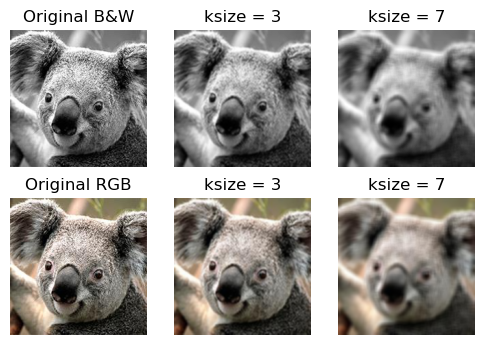

In [4]:
# TASK 2 - AVERAGE BLUR
def average_blur_gray(img, ksize):
     kernel = (1/ksize)*(1/ksize) * np.ones((ksize, ksize), dtype = np.uint8)
    
     return convolve(img, kernel)

def average_blur_RGB(img, ksize):
     kernel = (1/ksize)*(1/ksize) * np.ones((ksize, ksize))
    
     R, G, B = convolve(img[:,:,0], kernel), convolve(img[:,:,1], kernel), convolve(img[:,:,2], kernel)
    
     result = np.zeros(img.shape, dtype = np.uint8)
     for row in range(img.shape[0]):
         for col in range(img.shape[1]):
             result[row][col] = np.array([R[row][col], G[row][col], B[row][col]])

     return result

#displaying results
print("Part-A, Task 2: Average Blur")
plt.figure(figsize=((3/2)*4, 4))

plt.subplot(2, 3, 1)
plt.imshow(img_gray, cmap = 'gray')
plt.title("Original B&W")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(average_blur_gray(img_gray, 3), cmap = 'gray')
plt.title("ksize = 3")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(average_blur_gray(img_gray, 7), cmap = 'gray')
plt.title("ksize = 7")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(img)
plt.title("Original RGB")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(average_blur_RGB(img, 3))
plt.title("ksize = 3")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(average_blur_RGB(img, 7))
plt.title("ksize = 7")
plt.axis("off")

plt.show()

Part-A, Task 3: Gaussian Blur


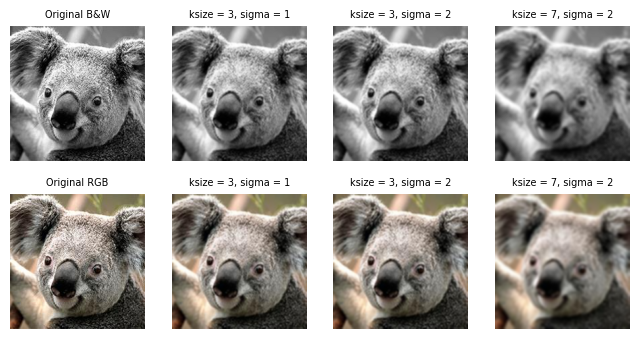

In [5]:
# TASK 3 - GAUSSIAN BLUR
def gaussian_kernel(ksize, sigma):
    mid = ksize//2 #position of middle value in the matrix
    norm = (1/(2*np.pi*(sigma**2)))*(np.e)**(-1*(mid**2 + mid**2)/(2*(sigma**2))) #least value. To be normalized to 1
    
    kernel = np.zeros((ksize, ksize), dtype = np.float32)
    for i in range(ksize):
        for j in range(ksize):
            kernel[i][j] = ((1/(2*np.pi*(sigma**2)))*(np.e)**(-1*((i-mid)**2 + (j-mid)**2)/(2*(sigma**2))) / norm)
    kernel *= 1/(np.sum(kernel)) #normalizing the sum of the array
    return kernel

def gaussian_blur_gray(img, ksize, sigma):
     kernel = gaussian_kernel(ksize, sigma)    
     return convolve(img, kernel)

def gaussian_blur_RGB(img, ksize, sigma):
     kernel = gaussian_kernel(ksize, sigma)  
    
     R, G, B = convolve(img[:,:,0], kernel), convolve(img[:,:,1], kernel), convolve(img[:,:,2], kernel)
    
     result = np.zeros(img.shape, dtype = np.uint8)
     for row in range(img.shape[0]):
         for col in range(img.shape[1]):
             result[row][col] = np.array([R[row][col], G[row][col], B[row][col]])

     return result

#displaying results
print("Part-A, Task 3: Gaussian Blur")
plt.figure(figsize=((4/2)*4, 4))

plt.subplot(2, 4, 1)
plt.imshow(img_gray, cmap = 'gray')
plt.title("Original B&W", fontsize = 7)
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(gaussian_blur_gray(img_gray, 3, 1), cmap = 'gray')
plt.title("ksize = 3, sigma = 1", fontsize = 7)
plt.axis("off")

plt.subplot(2, 4, 3)
plt.imshow(gaussian_blur_gray(img_gray, 3, 2), cmap = 'gray')
plt.title("ksize = 3, sigma = 2", fontsize = 7)
plt.axis("off")

plt.subplot(2, 4, 4)
plt.imshow(gaussian_blur_gray(img_gray, 7, 2), cmap = 'gray')
plt.title("ksize = 7, sigma = 2", fontsize = 7)
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(img)
plt.title("Original RGB", fontsize = 7)
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(gaussian_blur_RGB(img, 3, 1))
plt.title("ksize = 3, sigma = 1", fontsize = 7)
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(gaussian_blur_RGB(img, 3, 2))
plt.title("ksize = 3, sigma = 2", fontsize = 7)
plt.axis("off")

plt.subplot(2, 4, 8)
plt.imshow(gaussian_blur_RGB(img, 7, 2))
plt.title("ksize = 7, sigma = 2", fontsize = 7)
plt.axis("off")

plt.show()

### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [6]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

Part-B


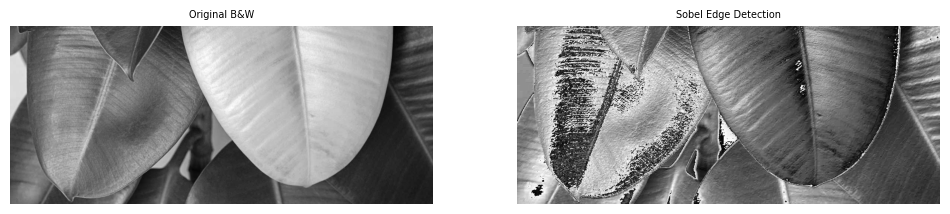

In [24]:
# 1.Gx
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
g_x = convolve(img_part5_gray/255.0, sobel_x)

# 2.Gy
sobel_y = np.array([[-1, -2, 1], [0, 0, 0], [1, 2, 1]])
g_y = convolve(img_part5_gray/255.0, sobel_y)

# G
G = (g_x**2 + g_y**2)**(1/2)
G = np.abs(G)
G = (G*255).astype(np.uint8) # scaling to 0-255

print("Part-B")
plt.figure(figsize=(2*6, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_part5_gray, cmap = 'gray')
plt.title("Original B&W", fontsize = 7)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(G, cmap = 'gray')
plt.title("Sobel Edge Detection", fontsize = 7)
plt.axis("off")

plt.show()

### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [8]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

Task-C
Task 1: Laplacian Sharpening


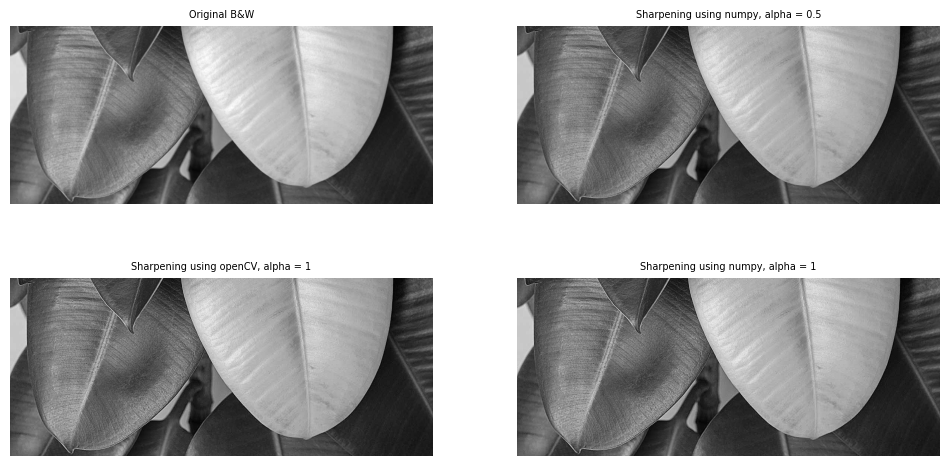

Is sharp_cv == sharp_np?: False
Number of differing pixels: 93 out of 547200


In [7]:
# PART C - Task 1
# 1: 4-connected laplacian kernel
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

# 2: sharpening using numpy
lap = convolve(img_part5_gray, laplacian_kernel)
sharp = img_part5_gray - lap * 0.5 # alpha = 0.5
sharp = np.clip(sharp, 0, 255).astype(np.uint8)

# 3: sharpening using cv2
lap_cv = cv2.Laplacian(np.float32(img_part5_gray), cv2.CV_32F)
sharp_cv = np.clip(img_part5_gray - lap_cv, 0, 255).astype(np.uint8)

sharp_np = np.float32(img_part5_gray) - lap * 1 # alpha = 1
sharp_np = np.clip(sharp_np, 0, 255).astype(np.uint8)


# displaying results
print("Task-C")
print("Task 1: Laplacian Sharpening")
plt.figure(figsize=(2*6, 6))

plt.subplot(2, 2, 1)
plt.imshow(img_part5_gray, cmap = 'gray')
plt.title("Original B&W", fontsize = 7)
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(sharp, cmap = 'gray')
plt.title("Sharpening using numpy, alpha = 0.5", fontsize = 7)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(sharp_cv, cmap = 'gray')
plt.title("Sharpening using openCV, alpha = 1", fontsize = 7)
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(sharp_np, cmap = 'gray')
plt.title("Sharpening using numpy, alpha = 1", fontsize = 7)
plt.axis("off")

plt.show()

# checking if the matrices are equal
print("Is sharp_cv == sharp_np?:", (sharp_cv == sharp_np).all())
diff_pixels = np.count_nonzero(sharp_cv != sharp_np)
total_pixels = sharp_cv.size
print("Number of differing pixels:", diff_pixels,  "out of",  total_pixels)

Task 2: Unsharp masking


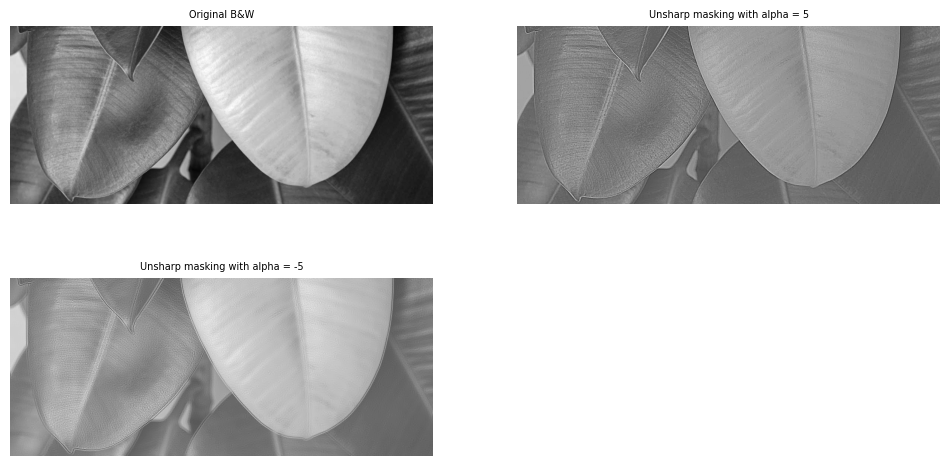

In [8]:
# PART C - Task 2
# 1.Applying Gaussian blur
blurred = gaussian_blur_gray(img_part5_gray, ksize = 5, sigma = 2)

# 2.Subtract blurred image from original
mask = img_part5_gray - blurred

# 3.Add scaled mask back
alpha = 5
sharp = img_part5_gray + alpha * mask

# 4.negative alpha
alpha = -5
sharp_neg = img_part5_gray + alpha * mask

# displaying results
print("Task 2: Unsharp masking")
plt.figure(figsize=(2*6, 6))

plt.subplot(2, 2, 1)
plt.imshow(img_part5_gray, cmap = 'gray')
plt.title("Original B&W", fontsize = 7)
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(sharp, cmap = 'gray')
plt.title("Unsharp masking with alpha = 5", fontsize = 7)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(sharp_neg, cmap = 'gray')
plt.title("Unsharp masking with alpha = -5", fontsize = 7)
plt.axis("off")

plt.show()

### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

Part-D
Magnitude Spectrum of Original Image:


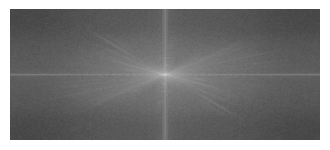

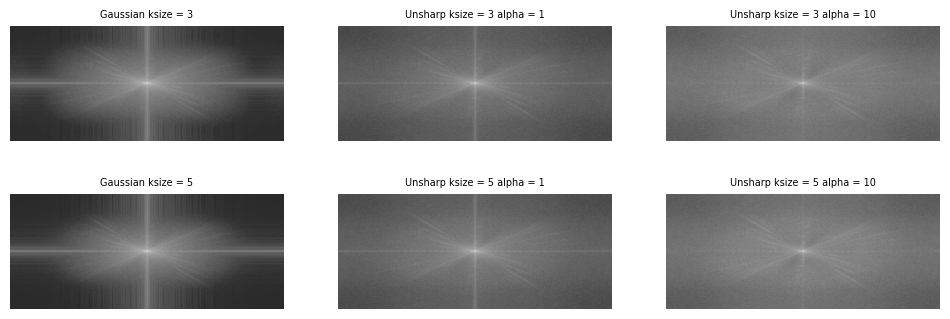

In [9]:
# PART D
original_fshift = np.fft.fftshift(np.fft.fft2(img_part5_gray))
original_magnitude = 20 * np.log(np.abs(original_fshift) + 1)

# ksize = 1
blurred_3 = gaussian_blur_gray(img_part5_gray, ksize = 3, sigma = 1)
gaussian_3_magnitude = 20 * np.log(np.abs(np.fft.fftshift(np.fft.fft2(blurred_3))) + 1)

mask = img_part5_gray - blurred_3
sharp_3_1 = img_part5_gray + 1 * mask # alpha = 1
sharp_3_10 = img_part5_gray + 10 * mask # alpha = 10
unsharp_3_1_magnitude = 20 * np.log(np.abs(np.fft.fftshift(np.fft.fft2(sharp_3_1))) + 1)
unsharp_3_10_magnitude = 20 * np.log(np.abs(np.fft.fftshift(np.fft.fft2(sharp_3_10))) + 1)

# ksize = 5
blurred_5 = gaussian_blur_gray(img_part5_gray, ksize = 5, sigma = 1)
gaussian_5_fshift = np.fft.fftshift(np.fft.fft2(blurred_5))
gaussian_5_magnitude = 20 * np.log(np.abs(gaussian_5_fshift) + 1)

mask = img_part5_gray - blurred_5
sharp_5_1 = img_part5_gray + 1 * mask # alpha = 1
sharp_5_10 = img_part5_gray + 10 * mask # alpha = 10
unsharp_5_1_magnitude = 20 * np.log(np.abs(np.fft.fftshift(np.fft.fft2(sharp_5_1))) + 1)
unsharp_5_10_magnitude = 20 * np.log(np.abs(np.fft.fftshift(np.fft.fft2(sharp_5_10))) + 1)



print("Part-D")
print("Magnitude Spectrum of Original Image:")
plt.figure(figsize=(4, 4))
plt.imshow(original_magnitude, cmap = 'gray') # Displays the magnitude spectrum
plt.axis("off")
plt.show()

#displaying results

plt.figure(figsize=(3*4, 4))

plt.subplot(2, 3, 1)
plt.imshow(gaussian_3_magnitude, cmap = 'gray')
plt.title("Gaussian ksize = 3", fontsize = 7)
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(unsharp_3_1_magnitude, cmap = 'gray')
plt.title("Unsharp ksize = 3 alpha = 1", fontsize = 7)
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(unsharp_3_10_magnitude, cmap = 'gray')
plt.title("Unsharp ksize = 3 alpha = 10", fontsize = 7)
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(gaussian_5_magnitude, cmap = 'gray')
plt.title("Gaussian ksize = 5", fontsize = 7)
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(unsharp_5_1_magnitude, cmap = 'gray')
plt.title("Unsharp ksize = 5 alpha = 1", fontsize = 7)
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(unsharp_5_10_magnitude, cmap = 'gray')
plt.title("Unsharp ksize = 5 alpha = 10", fontsize = 7)
plt.axis("off")

plt.show()
'''Gaussian Blurring: Higher frequencies are attenuated(outer region of shifted FFT is darkened), 
                      lower frequencies are passed through(center of shifted FFT is unchanged)   
   Kernel Size Effect: Increasing the kernel size (more blur) makes the bright central spot smaller and the outer regions darker, 
                       as we cut off even more frequencies.

   Unsharp Masking: Higher frequencies are amplified (outer region of shifted FFT is brightened)
   Alpha Effect: Increasing alpha amplifies the high-frequency components even more (brighter outer region)

   Convolution in the spatial domain equals filtering by masks in the frequency domain i.e. Kernels = Masks in Frequency Domain
   FFT of Gaussian kernel → circular low-pass, radius decreases with increasing ksize
   FFT of sharpen kernel → (alpha) x ring-shaped high-pass, more energy is injected into higher frequencies with increasing alpha
'''
pass

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

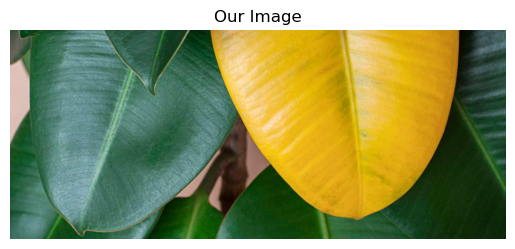

In [10]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

Analyzing R, G, B values


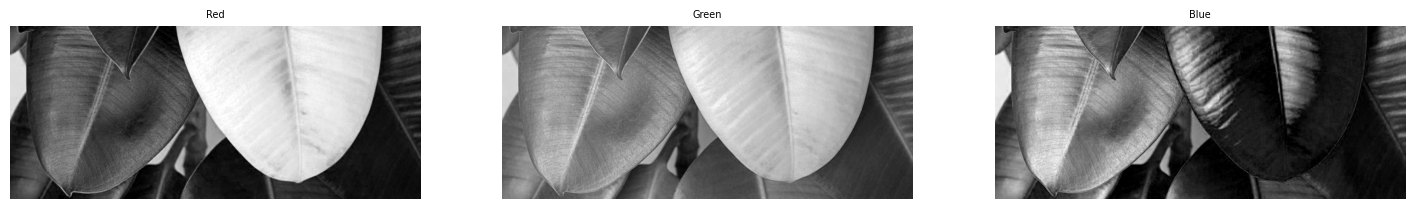

Response Maps


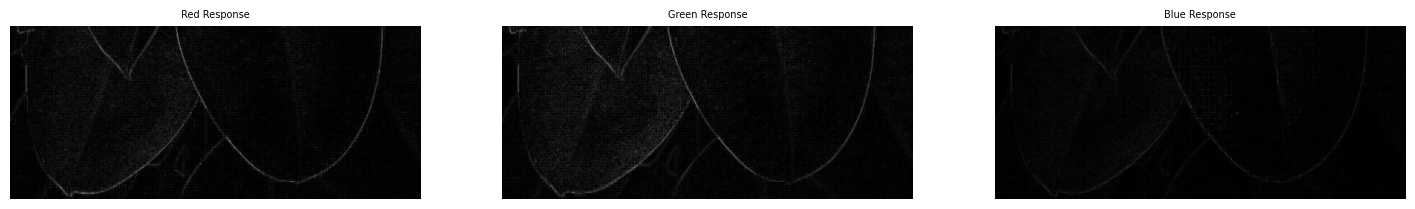

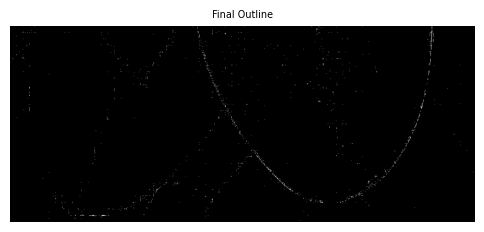

In [92]:
# 1
R, G, B = img_part5[:, :, 0], img_part5[:, :, 1], img_part5[:, :, 2]
print("Analyzing R, G, B values")
plt.figure(figsize=(3*6, 6))

plt.subplot(1, 3, 1)
plt.imshow(R, cmap = 'gray')
plt.title("Red", fontsize = 7)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(G, cmap = 'gray')
plt.title("Green", fontsize = 7)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(B, cmap = 'gray')
plt.title("Blue", fontsize = 7)
plt.axis("off")

plt.show()
# In Yellow regions: R is very high, G is high, B is very low
# In Green regions: R is very very low, G is low, B is very low


# 2: custom kernel that responds strongly to change from green to yellow
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

R_map = np.abs(convolve(R, kernel))
G_map = np.abs(convolve(G, kernel))
B_map = np.abs(convolve(B, kernel))


# 3: Combining response maps
# Simple thresholding to remove weak background noise - (Selects pixels brighter than 60)
total_map = np.where(R_map + G_map - 5 * B_map > 60, 255, 0) #included B_map as well to remove outline of other leaves

print("Response Maps")
plt.figure(figsize=(3*6, 6))

plt.subplot(1, 3, 1)
plt.imshow(R_map, cmap = 'gray')
plt.title("Red Response", fontsize = 7)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(G_map, cmap = 'gray')
plt.title("Green Response", fontsize = 7)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(B_map, cmap = 'gray')
plt.title("Blue Response", fontsize = 7)
plt.axis("off")

plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(total_map, cmap = 'gray')
plt.title("Final Outline", fontsize = 7)
plt.axis("off")
plt.show()

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
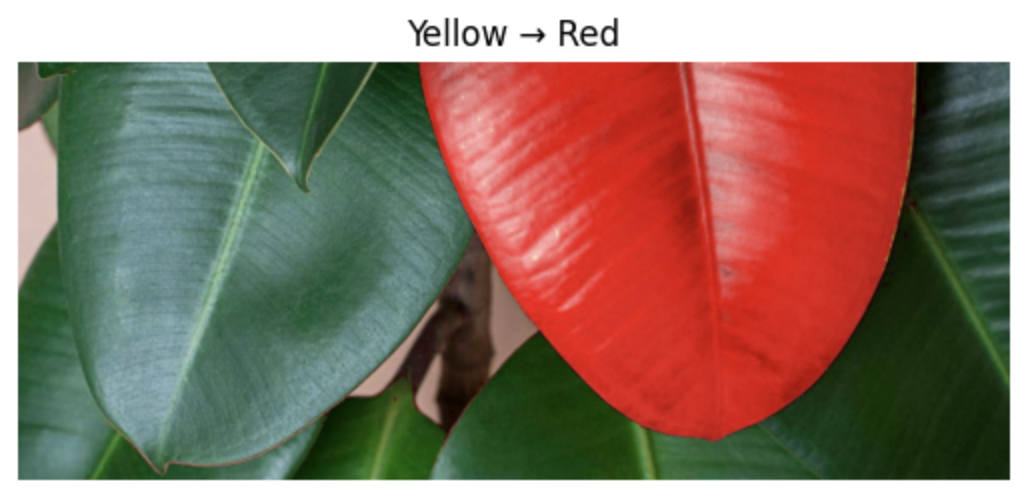

Also, we can change to a less brighter colour
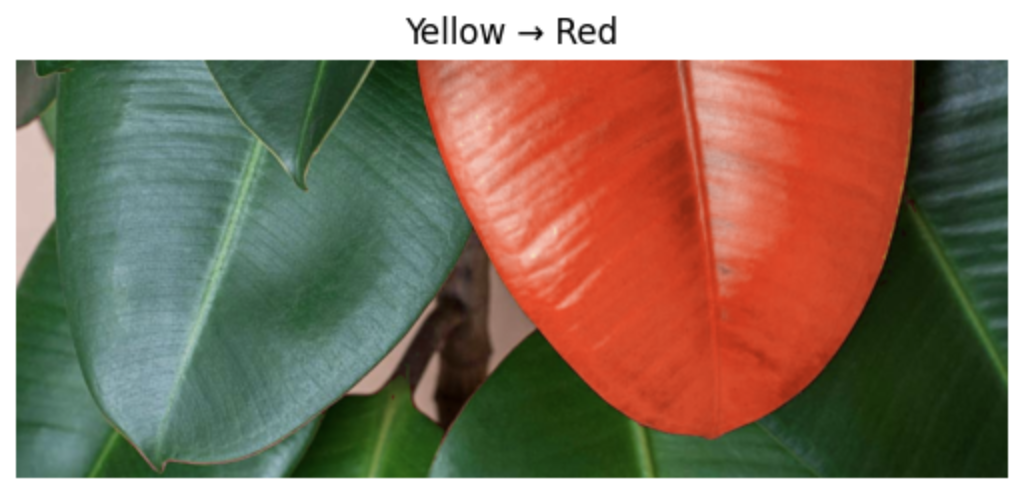

In [ ]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.

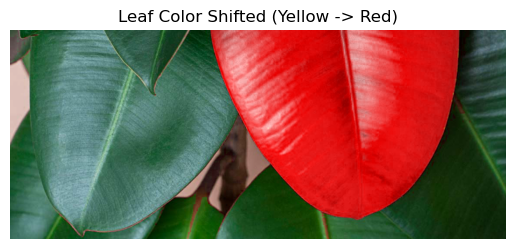

In [98]:
# 1.Converting the RGB image to HSV
def rgb_to_hsv(img):
    hsv = np.zeros(img.shape, dtype = np.uint8)
    for x, row in enumerate(img):
        for y, pixel in enumerate(row):
            r, g, b = pixel[0], pixel[1], pixel[2]
            r, g, b = np.float32(r / 255.0), np.float32(g / 255.0), np.float32(b / 255.0)

            cmax = max(r, g, b)
            cmin = min(r, g, b)
            diff = cmax-cmin

            if cmax == cmin: 
                h = 0
            elif cmax == r: 
                h = (60 * ((g - b) / diff) + 360) % 360
            elif cmax == g:
                h = (60 * ((b - r) / diff) + 120) % 360
            elif cmax == b:
                h = (60 * ((r - g) / diff) + 240) % 360
            h /= 2

            if cmax == 0:
                s = 0
            else:
                s = (diff / cmax) * 255
        
            v = cmax * 255
            hsv[x, y] = [h, s, v]
    return hsv
img_part5_hsv = rgb_to_hsv(img_part5)

#2 Identifying pixels belonging to the yellow leaf using an HSV mask. 
# Yellow hue = 30 deg
H = img_part5_hsv[:, :, 0]
yellow_mask = (H > 15) & (H< 45)

# Changing the colour of the leaf to red.
# Yellow hue = 30 deg, Red hue = 0 deg, Hue Shift = -30 deg
img_part5_hsv[yellow_mask, 0] = np.clip(img_part5_hsv[yellow_mask, 0].astype(int) - 30, 0, 180).astype(np.uint8)

# converting back to rgb
img_RGB = cv2.cvtColor(img_part5_hsv, cv2.COLOR_HSV2RGB)

plt.title("Leaf Color Shifted (Yellow -> Red)")
plt.imshow(img_RGB)
plt.axis("off")
plt.show()